## GET AROUND EXPLORATION

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORTATIONS

### Import des librairies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

### Import du dataset

In [4]:
df=pd.read_excel("/content/drive/MyDrive/Projets RNCP/Block 5/get_around_delay_analysis.xlsx")
doc =  pd.read_excel('/content/drive/MyDrive/Projets RNCP/Block 5/get_around_delay_analysis.xlsx',sheet_name='Documentation')

In [5]:
df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [6]:
with pd.option_context('display.max_colwidth', None):
  display(doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


## EXPLORATION DU DATASET

In [7]:
# Basic stats

print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
print(data_desc)

print("Percentage of missing values: ")
display(100 * df.isnull().sum() / df.shape[0])


Number of rows : 21310

Display of dataset: 


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN



Basics statistics: 
            rental_id         car_id checkin_type  state  \
count    21310.000000   21310.000000        21310  21310   
unique            NaN            NaN            2      2   
top               NaN            NaN       mobile  ended   
freq              NaN            NaN        17003  18045   
mean    549712.880338  350030.603426          NaN    NaN   
std      13863.446964   58206.249765          NaN    NaN   
min     504806.000000  159250.000000          NaN    NaN   
25%     540613.250000  317639.000000          NaN    NaN   
50%     550350.000000  368717.000000          NaN    NaN   
75%     560468.500000  394928.000000          NaN    NaN   
max     576401.000000  417675.000000          NaN    NaN   

        delay_at_checkout_in_minutes  previous_ended_rental_id  \
count                   16346.000000               1841.000000   
unique                           NaN                       NaN   
top                              NaN                       N

,0
rental_id,0.000000
car_id,0.000000
checkin_type,0.000000
state,0.000000
delay_at_checkout_in_minutes,23.294228
previous_ended_rental_id,91.360863
time_delta_with_previous_rental_in_minutes,91.360863


In [8]:
# Création de la colonne next_rental_id
valid_previous_ended_rentals = df.dropna(subset=['previous_ended_rental_id'])

previous_to_current = valid_previous_ended_rentals.set_index('previous_ended_rental_id')['rental_id'].to_dict()

df['next_rental_id'] = df['rental_id'].map(previous_to_current)

display(df)

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,next_rental_id
0,505000,363965,mobile,canceled,NaN,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0,NaN
21306,573790,341965,mobile,ended,-337.0,NaN,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN,NaN


In [9]:
# Compter les valeurs uniques de la colonne state

valeurs_uniques_state = df['state'].value_counts()
valeurs_uniques_state

,count
state,
ended,18045
canceled,3265


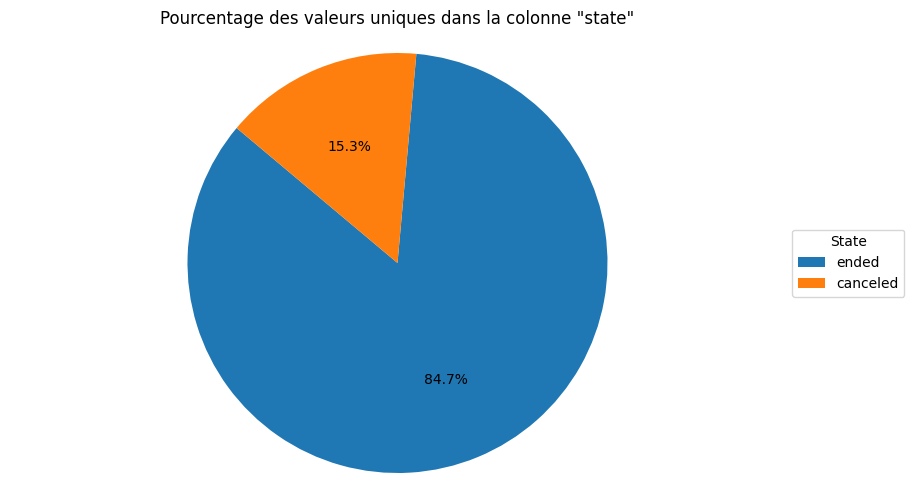

In [10]:
# Visualisaton de la distribution des valeurs uniques de la colonne state

pourcentages_state = valeurs_uniques_state / valeurs_uniques_state.sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(pourcentages_state, autopct='%1.1f%%', startangle=140)

ax.legend(wedges, pourcentages_state.index, title="State", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Pourcentage des valeurs uniques dans la colonne "state"')
plt.axis('equal')
plt.show()

In [11]:
# Compter les valeurs uniques de la colonne checkin_type

valeurs_uniques_checkin_type = df['checkin_type'].value_counts()
valeurs_uniques_checkin_type

,count
checkin_type,
mobile,17003
connect,4307


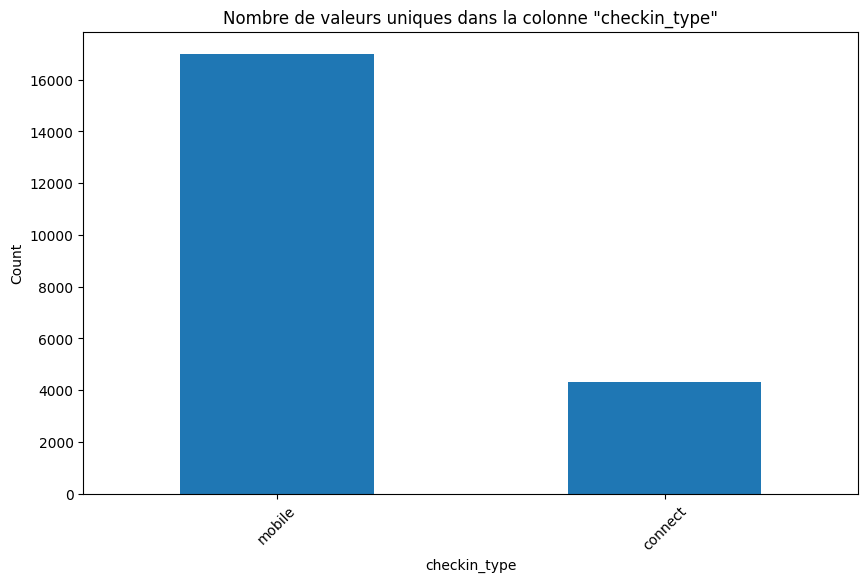

In [12]:
# Visualisaton de la distribution des valeurs uniques de la colonne checkin_type

plt.figure(figsize=(10, 6))
valeurs_uniques_checkin_type.plot(kind='bar')

plt.xlabel('checkin_type')
plt.ylabel('Count')
plt.title('Nombre de valeurs uniques dans la colonne "checkin_type"')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.grid(False)

plt.show()

In [13]:
# Visualisation des checkout en retard, en avance et à temps

df_mobile = df[df['checkin_type'] == 'mobile'].copy()
df_connect = df[df['checkin_type'] == 'connect'].copy()

df_mobile = df_mobile.dropna(subset=['delay_at_checkout_in_minutes'])
df_connect = df_connect.dropna(subset=['delay_at_checkout_in_minutes'])

conditions_mobile = [
    (df_mobile['delay_at_checkout_in_minutes'] > 0),
    (df_mobile['delay_at_checkout_in_minutes'] == 0),
    (df_mobile['delay_at_checkout_in_minutes'] < 0)
]
choices = ['Retard', 'À temps', 'En avance']

df_mobile['checkout_status'] = np.select(conditions_mobile, choices)

conditions_connect = [
    (df_connect['delay_at_checkout_in_minutes'] > 0),
    (df_connect['delay_at_checkout_in_minutes'] == 0),
    (df_connect['delay_at_checkout_in_minutes'] < 0)
]

df_connect['checkout_status'] = np.select(conditions_connect, choices)

df_mobile['checkin_type'] = 'mobile'
df_connect['checkin_type'] = 'connect'

df_combined = pd.concat([df_mobile, df_connect])

status_counts = df_combined.groupby(['checkin_type', 'checkout_status']).size().reset_index(name='Count')

fig = px.bar(status_counts, x='checkout_status', y='Count', color='checkin_type',
             barmode='group', labels={'checkout_status': 'Status de Checkout', 'Count': 'Count', 'checkin_type': 'Type de Check-in'},
             title='Nombre de checkouts en retard, à temps et en avance par Type de Check-in',
             width=800, height=600)

fig.show()

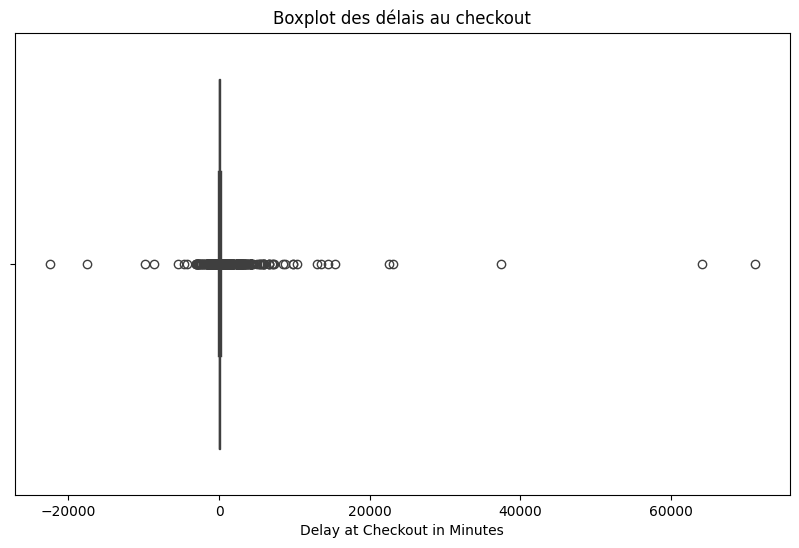

In [14]:
# Visualisation de la distribution des outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delay_at_checkout_in_minutes'])
plt.title('Boxplot des délais au checkout')
plt.xlabel('Delay at Checkout in Minutes')
plt.show()

In [15]:
# Filtrer les valeurs positives de delay_at_checkout_in_minutes et calculer leur maximum

positive_delays = df[df['delay_at_checkout_in_minutes'] > 0]['delay_at_checkout_in_minutes']

max_positive_delay = positive_delays.max()

print(f"Le maximum des valeurs positives de delay_at_checkout_in_minutes : {max_positive_delay} minutes")

Le maximum des valeurs positives de delay_at_checkout_in_minutes : 71084.0 minutes


In [16]:
# Détermination des outliers par rapport à la colonne delay_at_checkout_in_minutes

# Calculer Q1 (25e centile) et Q3 (75e centile)
Q1 = positive_delays.quantile(0.25)
Q3 = positive_delays.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Détecter les outliers
outliers = positive_delays[(positive_delays < lower_bound) | (positive_delays > upper_bound)]

# Afficher les résultats
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers:\n{outliers}")

Q1: 19.0
Q3: 131.0
IQR: 112.0
Lower Bound: -149.0
Upper Bound: 299.0
Outliers:
24       1452.0
94        780.0
99        933.0
102      1967.0
114      3233.0
          ...  
21155     564.0
21214    1108.0
21246     362.0
21258     735.0
21298     549.0
Name: delay_at_checkout_in_minutes, Length: 1052, dtype: float64


Nous allons traiter par la suite que les cas des locations où il y'a un retard de retour.

In [17]:
# Filtrage du dataset par rapport aux outliers et retards positifs
filtered_df = df[
    (df['delay_at_checkout_in_minutes'] > 0) &  # Filtrer les valeurs positives
    (df['delay_at_checkout_in_minutes'] >= lower_bound) &  # Supérieur à la limite inférieure
    (df['delay_at_checkout_in_minutes'] <= upper_bound)  # Inférieur à la limite supérieure
]

#### 1- Quelle part des revenus de notre propriétaire serait potentiellement affectée par cette fonctionnalité ?

In [18]:
# Compter les valeurs uniques de la colonne checkin_type pour filtered_df

valeurs_uniques_checkin_type = filtered_df['checkin_type'].value_counts()
valeurs_uniques_checkin_type

,count
checkin_type,
mobile,6945
connect,1407


checkin_type
mobile     83.153736
connect    16.846264
Name: count, dtype: float64


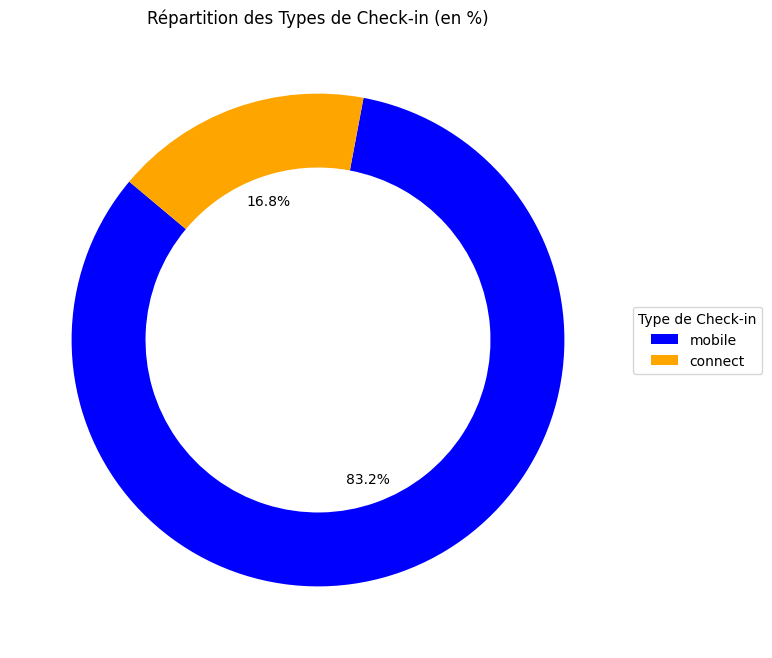

In [19]:
# Distribution des types de checkin
pourcentages_checkin_type = (valeurs_uniques_checkin_type / len(filtered_df)) * 100

print(pourcentages_checkin_type)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(pourcentages_checkin_type, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140, wedgeprops=dict(width=0.3))

plt.legend(wedges, pourcentages_checkin_type.index, title="Type de Check-in", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Répartition des Types de Check-in (en %)')
plt.show()

Nous constatons que la plupart des modes de checkin sont en mobile

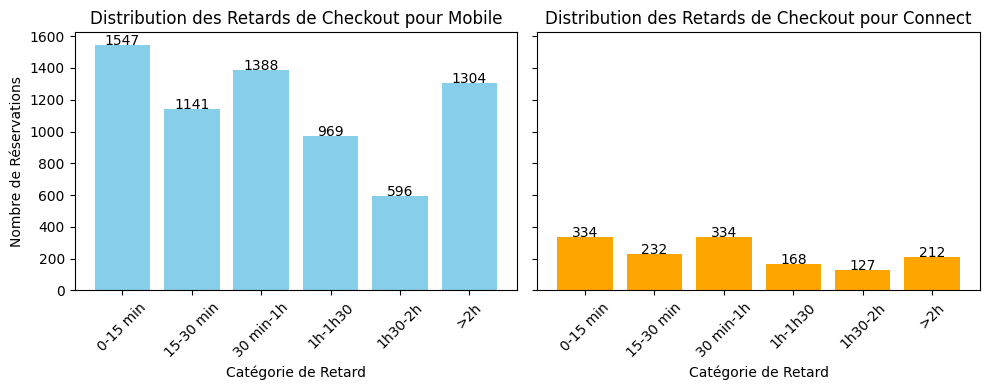

In [20]:
# Visualisation des types de retards selon le mode de checkin

filtered_df = filtered_df[filtered_df['delay_at_checkout_in_minutes'] > 0]

bins = [0, 15, 30, 60, 90, 120, float('inf')]
labels = ['0-15 min', '15-30 min', '30 min-1h', '1h-1h30', '1h30-2h', '>2h']

filtered_df_mobile = filtered_df[filtered_df['checkin_type'] == 'mobile'].copy()
filtered_df_connect = filtered_df[filtered_df['checkin_type'] == 'connect'].copy()

filtered_df_mobile['delay_category'] = pd.cut(filtered_df_mobile['delay_at_checkout_in_minutes'], bins=bins, labels=labels, right=False)
filtered_df_connect['delay_category'] = pd.cut(filtered_df_connect['delay_at_checkout_in_minutes'], bins=bins, labels=labels, right=False)

delay_category_counts_mobile = filtered_df_mobile['delay_category'].value_counts().sort_index()
delay_category_counts_connect = filtered_df_connect['delay_category'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].bar(delay_category_counts_mobile.index, delay_category_counts_mobile.values, color='skyblue')
axes[0].set_title('Distribution des Retards de Checkout pour Mobile')
axes[0].set_xlabel('Catégorie de Retard')
axes[0].set_ylabel('Nombre de Réservations')
axes[0].set_xticks(range(len(labels)))
axes[0].set_xticklabels(labels, rotation=45)
for index, value in enumerate(delay_category_counts_mobile):
    axes[0].text(index, value + 0.5, str(value), ha='center')

axes[1].bar(delay_category_counts_connect.index, delay_category_counts_connect.values, color='orange')
axes[1].set_title('Distribution des Retards de Checkout pour Connect')
axes[1].set_xlabel('Catégorie de Retard')
axes[1].set_xticks(range(len(labels)))
axes[1].set_xticklabels(labels, rotation=45)
for index, value in enumerate(delay_category_counts_connect):
    axes[1].text(index, value + 0.5, str(value), ha='center')

plt.tight_layout()
plt.show()

In [21]:
# Calcul des parts de marché pour checkin_type

total_checkins = filtered_df['checkin_type'].value_counts()

market_share = (total_checkins / total_checkins.sum()) * 100

# Afficher les résultats
print("Parts de marché pour chaque mode de check-in :")
print(market_share)

Parts de marché pour chaque mode de check-in :
checkin_type
mobile     83.153736
connect    16.846264
Name: count, dtype: float64


In [22]:
# Pour df non filtré
# Calculer le nombre de réservations annulées pour chaque mode
canceled_checkins = df[df['state'] == 'canceled']['checkin_type'].value_counts()

total_checkins_df = df['checkin_type'].value_counts()

cancellation_rate = (canceled_checkins / total_checkins_df) * 100
cancellation_rate = cancellation_rate.fillna(0)

print("Taux d'annulation pour chaque mode de check-in :")
print(cancellation_rate)

Taux d'annulation pour chaque mode de check-in :
checkin_type
mobile     14.509204
connect    18.527978
Name: count, dtype: float64


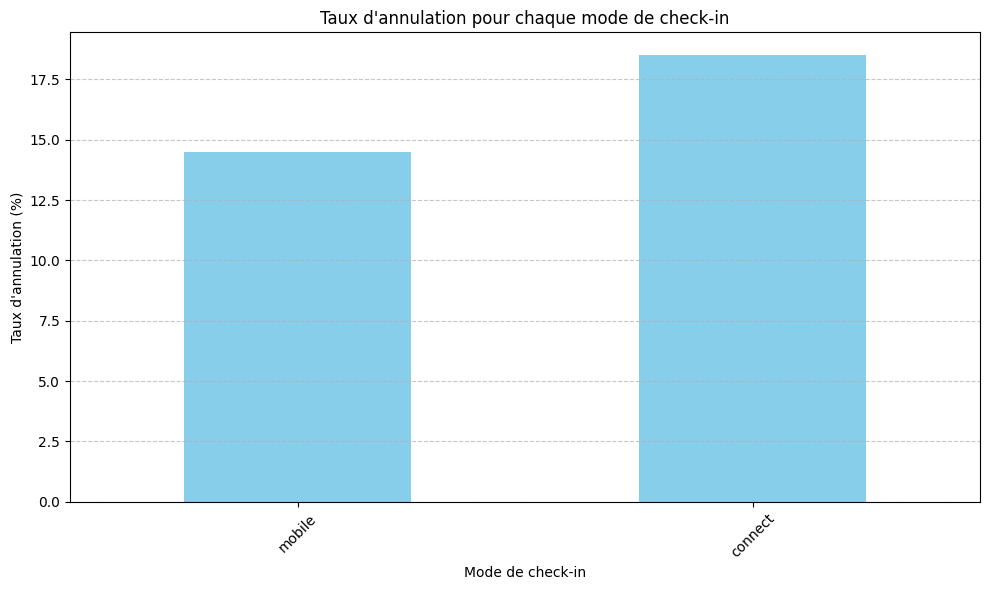

In [23]:
# Visualiser le taux d'annulation dans un graphique à barres toujours pour df

plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar', color='skyblue')

plt.title('Taux d\'annulation pour chaque mode de check-in')
plt.xlabel('Mode de check-in')
plt.ylabel('Taux d\'annulation (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Pour une première hypothèse, nous constatons que les propriétaires qui seront le plus impactés sont ceux qui ont un mode de checkin connecté, car d'une part ils ont moins de retard et ont plus d'annulations par rapport aux mobiles.

#### 2- Combien de locations seraient affectées par la fonctionnalité en fonction du seuil et de la portée que nous choisissons ?

Moyenne du retard pour les checkins mobiles après suppression des outliers : 67.6060475161987 minutes
Médiane du retard pour les checkins mobiles après suppression des outliers : 44.0 minutes
Mode du retard pour les checkins mobiles après suppression des outliers : 4.0 minutes
Moyenne du retard pour les checkins connectés après suppression des outliers : 60.88770433546553 minutes
Médiane du retard pour les checkins connectés après suppression des outliers : 40.0 minutes
Mode du retard pour les checkins connectés après suppression des outliers : 8.0 minutes


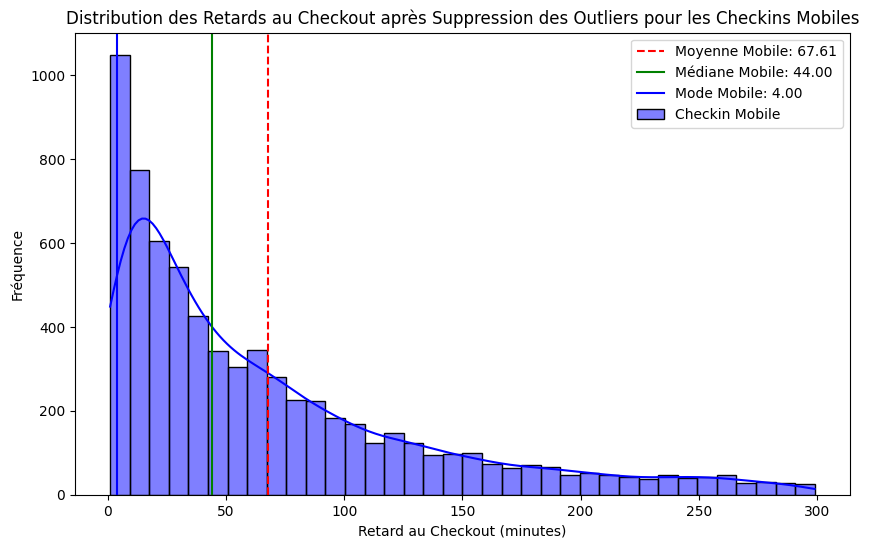

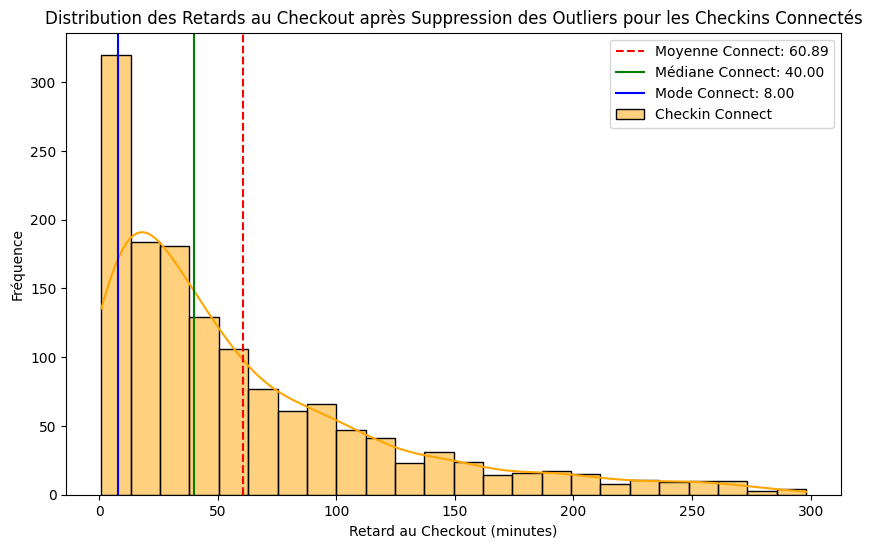

Seuil de retard à appliquer pour les checkins mobiles : 44.0 minutes
Seuil de retard à appliquer pour les checkins connectés : 40.0 minutes


In [24]:
# Visualisation de la distribution des checkin mobiles et connectés et calcul de la médiane, du mode et de la moyenne

filtered_mobile_delays = filtered_df[(filtered_df['delay_at_checkout_in_minutes'] > 0) & (filtered_df['checkin_type'] == 'mobile')]['delay_at_checkout_in_minutes']
filtered_connect_delays = filtered_df[(filtered_df['delay_at_checkout_in_minutes'] > 0) & (filtered_df['checkin_type'] == 'connect')]['delay_at_checkout_in_minutes']


mean_mobile_delay = filtered_mobile_delays.mean()
median_mobile_delay = filtered_mobile_delays.median()
mode_mobile_delay = filtered_mobile_delays.mode()[0]

mean_connect_delay = filtered_connect_delays.mean()
median_connect_delay = filtered_connect_delays.median()
mode_connect_delay = filtered_connect_delays.mode()[0]


print(f"Moyenne du retard pour les checkins mobiles après suppression des outliers : {mean_mobile_delay} minutes")
print(f"Médiane du retard pour les checkins mobiles après suppression des outliers : {median_mobile_delay} minutes")
print(f"Mode du retard pour les checkins mobiles après suppression des outliers : {mode_mobile_delay} minutes")


print(f"Moyenne du retard pour les checkins connectés après suppression des outliers : {mean_connect_delay} minutes")
print(f"Médiane du retard pour les checkins connectés après suppression des outliers : {median_connect_delay} minutes")
print(f"Mode du retard pour les checkins connectés après suppression des outliers : {mode_connect_delay} minutes")


plt.figure(figsize=(10, 6))
sns.histplot(filtered_mobile_delays, kde=True, color='blue', label='Checkin Mobile')
plt.axvline(mean_mobile_delay, color='r', linestyle='--', label=f'Moyenne Mobile: {mean_mobile_delay:.2f}')
plt.axvline(median_mobile_delay, color='g', linestyle='-', label=f'Médiane Mobile: {median_mobile_delay:.2f}')
plt.axvline(mode_mobile_delay, color='b', linestyle='-', label=f'Mode Mobile: {mode_mobile_delay:.2f}')
plt.xlabel('Retard au Checkout (minutes)')
plt.ylabel('Fréquence')
plt.title('Distribution des Retards au Checkout après Suppression des Outliers pour les Checkins Mobiles')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(filtered_connect_delays, kde=True, color='orange', label='Checkin Connect')
plt.axvline(mean_connect_delay, color='r', linestyle='--', label=f'Moyenne Connect: {mean_connect_delay:.2f}')
plt.axvline(median_connect_delay, color='g', linestyle='-', label=f'Médiane Connect: {median_connect_delay:.2f}')
plt.axvline(mode_connect_delay, color='b', linestyle='-', label=f'Mode Connect: {mode_connect_delay:.2f}')
plt.xlabel('Retard au Checkout (minutes)')
plt.ylabel('Fréquence')
plt.title('Distribution des Retards au Checkout après Suppression des Outliers pour les Checkins Connectés')
plt.legend()
plt.show()


seuil_retard_mobile = median_mobile_delay
seuil_retard_connect = median_connect_delay

print(f"Seuil de retard à appliquer pour les checkins mobiles : {seuil_retard_mobile} minutes")
print(f"Seuil de retard à appliquer pour les checkins connectés : {seuil_retard_connect} minutes")


Alors, nous allons faire des tests avec les deux seuils obtenus pour voir quel seuil va affecter le plus les locations. Le seuil sera appliqué aux deux modes de checkin mobiles et connectés car mêmes ces derniers présentent des retards importants.

In [25]:
# Calcul de nombre de locations dont le retard dépasse 40 et 45 minutes

delays_above_40 = filtered_df[filtered_df['delay_at_checkout_in_minutes'] > 40]
nombre_locations_above_40 = delays_above_40.shape[0]

delays_above_45 = filtered_df[filtered_df['delay_at_checkout_in_minutes'] > 45]
nombre_locations_above_45 = delays_above_45.shape[0]

nombre_mobiles_above_40 = delays_above_40[delays_above_40['checkin_type'] == 'mobile'].shape[0]
nombre_connects_above_40 = delays_above_40[delays_above_40['checkin_type'] == 'connect'].shape[0]

nombre_mobiles_above_45 = delays_above_45[delays_above_45['checkin_type'] == 'mobile'].shape[0]
nombre_connects_above_45 = delays_above_45[delays_above_45['checkin_type'] == 'connect'].shape[0]

print(f"Nombre de locations dont le retard dépasse 40 minutes : {nombre_locations_above_40}")
print(f"Nombre de check-ins mobiles dont le retard dépasse 40 minutes : {nombre_mobiles_above_40}")
print(f"Nombre de check-ins connectés dont le retard dépasse 40 minutes : {nombre_connects_above_40}")

print(f"Nombre de locations dont le retard dépasse 45 minutes : {nombre_locations_above_45}")
print(f"Nombre de check-ins mobiles dont le retard dépasse 45 minutes : {nombre_mobiles_above_45}")
print(f"Nombre de check-ins connectés dont le retard dépasse 45 minutes : {nombre_connects_above_45}")


Nombre de locations dont le retard dépasse 40 minutes : 4341
Nombre de check-ins mobiles dont le retard dépasse 40 minutes : 3646
Nombre de check-ins connectés dont le retard dépasse 40 minutes : 695
Nombre de locations dont le retard dépasse 45 minutes : 4043
Nombre de check-ins mobiles dont le retard dépasse 45 minutes : 3400
Nombre de check-ins connectés dont le retard dépasse 45 minutes : 643


In [26]:
# Calcul de l'impact en analysant les différents délais donnés dans le dataset

impacted_df = filtered_df.dropna(subset=['time_delta_with_previous_rental_in_minutes']).copy()
impacted_df.loc[:, 'difference'] = impacted_df['time_delta_with_previous_rental_in_minutes'] - impacted_df['delay_at_checkout_in_minutes']
issues = len(impacted_df[impacted_df['difference'] < 0])
issues_percentage = issues/len(filtered_df)*100
issues_percentage


2.5383141762452106

Donc les délais donnés dans le dataset présentent un impact mineur de 2.53%, voyons maintenant la variation de ces délais dans notre dataset.

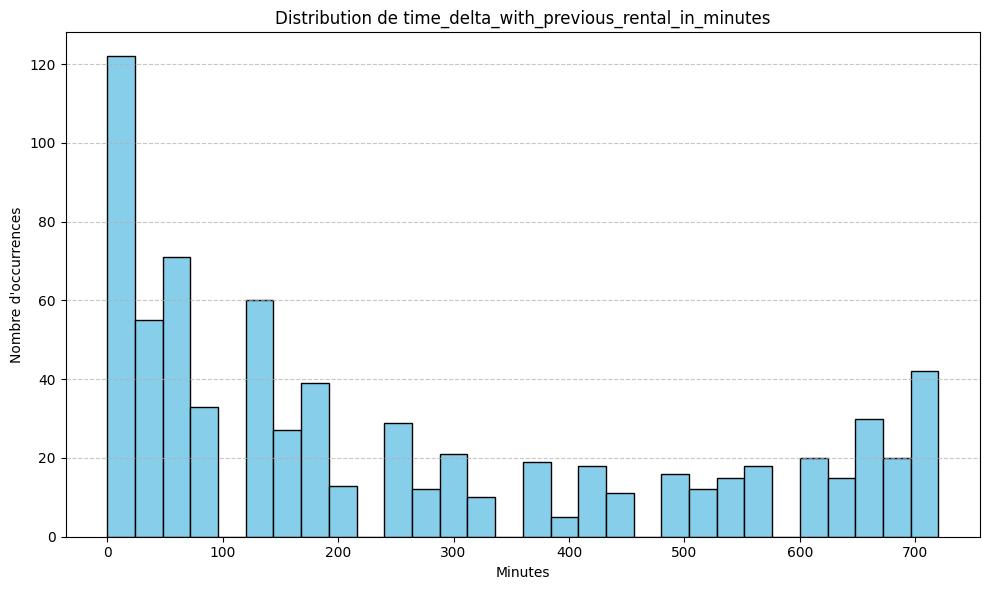

In [27]:
# Variation des valeurs de time_delta_with_previous_rental_in_minutes
plt.figure(figsize=(10, 6))
plt.hist(impacted_df['time_delta_with_previous_rental_in_minutes'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution de time_delta_with_previous_rental_in_minutes')
plt.xlabel('Minutes')
plt.ylabel('Nombre d\'occurrences')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nous constatons du coup que les délis entre 0 et 75 minutes sont les plus présents dans notre dataset

In [28]:
# Résultats
print(f"{issues} conducteurs ({round(issues_percentage,2)}%) sont impactés par le délai entre deux locations consécutives ")

print(f"{len(impacted_df[impacted_df['difference'] < -40])} conducteurs qui sont impactés sont en retard de plus 40 minutes")

print(f"Implémenter un délai de 40min entre deux locations va impacter {len(impacted_df[impacted_df['time_delta_with_previous_rental_in_minutes'] < 40])} conducteur")

print(f"{len(impacted_df[impacted_df['difference'] < -45])} conducteurs qui sont impactés sont en retard de plus 45 minutes")

print(f"Implémenter un délai de 45min entre deux locations va impacter {len(impacted_df[impacted_df['time_delta_with_previous_rental_in_minutes'] < 45])} conducteur")

212 conducteurs (2.54%) sont impactés par le délai entre deux locations consécutives 
121 conducteurs qui sont impactés sont en retard de plus 40 minutes
Implémenter un délai de 40min entre deux locations va impacter 177 conducteur
110 conducteurs qui sont impactés sont en retard de plus 45 minutes
Implémenter un délai de 45min entre deux locations va impacter 177 conducteur


Nous constatons qu'au niveau impact, 40 ou 45 minutes de délai entre 2 locations ont des impacts similaires sur les conducteurs

In [29]:
# Calcul des impacts et des cas résolus

threshold_range = np.arange(0, 60*12, step=15) # 15min intervals for 12 hours
impacted_list_mobile = []
impacted_list_connect = []
impacted_list_total = []
solved_list_mobile = []
solved_list_connect = []
solved_list_total = []

solved_list = []
for t in threshold_range:
    impacted = impacted_df.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
    connect_impact = impacted[impacted['checkin_type'] == 'connect']
    mobile_impact = impacted[impacted['checkin_type'] == 'mobile']
    connect_impact = connect_impact[connect_impact['time_delta_with_previous_rental_in_minutes'] < t]
    mobile_impact = mobile_impact[mobile_impact['time_delta_with_previous_rental_in_minutes'] < t]
    impacted = impacted[impacted['time_delta_with_previous_rental_in_minutes'] < t]
    impacted_list_connect.append(len(connect_impact))
    impacted_list_mobile.append(len(mobile_impact))
    impacted_list_total.append(len(impacted))

    solved = impacted_df[impacted_df['difference'] < 0]
    connect_solved = solved[solved['checkin_type'] == 'connect']
    mobile_solved = solved[solved['checkin_type'] == 'mobile']
    connect_solved = connect_solved[connect_solved['delay_at_checkout_in_minutes'] < t]
    mobile_solved = mobile_solved[mobile_solved['delay_at_checkout_in_minutes'] < t]
    solved = solved[solved['delay_at_checkout_in_minutes'] < t]
    solved_list_connect.append(len(connect_solved))
    solved_list_mobile.append(len(mobile_solved))
    solved_list_total.append(len(solved))

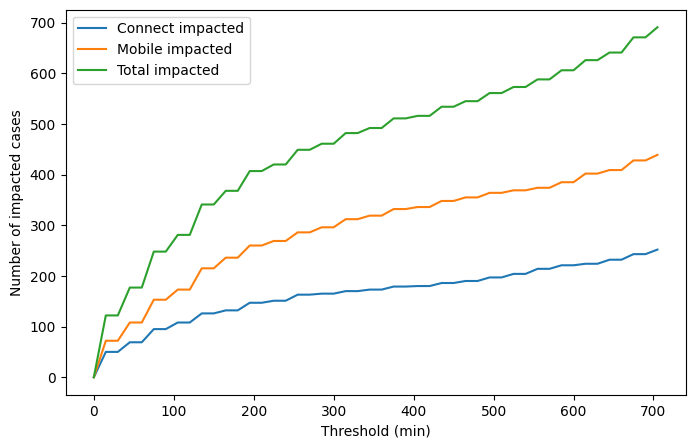

In [30]:
# Calcul/Affichage des impacts

fig, ax = plt.subplots(figsize=(8, 5))  # Utilisation d'un seul subplot

ax.plot(threshold_range, impacted_list_connect, label='Connect impacted')
ax.plot(threshold_range, impacted_list_mobile, label='Mobile impacted')
ax.plot(threshold_range, impacted_list_total, label='Total impacted')

ax.set_xlabel('Threshold (min)')
ax.set_ylabel('Number of impacted cases')
ax.legend()

plt.show()

Donc nous constatons d'après les analyse précèdentes et les graphes ci-dessus qu'un seuil de 45minutes reste un bon compromis pour minimiser les impacts et augmenter la résolution des problèmes.
Après le choix du seuil dépend vraiment des objectifs et des attentes de l'entreprise, est ce qu'ils veulent garder plus de locations possibles ou jouer sur l'amélioration des impacts causés par les retours de véhicules.  
De plus, si le délai augmente > le chiffre d'affaires baissera.

#### 3- À quelle fréquence les conducteurs sont-ils en retard pour le checkout ? Quel est l'impact sur le conducteur suivant ?


In [31]:
# Occurrence des retards pour les prochains checkout

df_mobile = filtered_df[filtered_df['checkin_type'] == 'mobile'].copy()
df_connect = filtered_df[filtered_df['checkin_type'] == 'connect'].copy()

df_mobile = df_mobile.dropna(subset=['delay_at_checkout_in_minutes'])
df_connect = df_connect.dropna(subset=['delay_at_checkout_in_minutes'])

df_mobile = df_mobile[df_mobile['delay_at_checkout_in_minutes'] > 0]
df_connect = df_connect[df_connect['delay_at_checkout_in_minutes'] > 0]

df_mobile['checkout_status'] = 'Retard'
df_connect['checkout_status'] = 'Retard'

df_combined = pd.concat([df_mobile, df_connect])

status_counts = df_combined.groupby(['checkin_type', 'checkout_status']).size().reset_index(name='Count')

fig = px.bar(status_counts, x='checkout_status', y='Count', color='checkin_type',
             barmode='group', labels={'checkout_status': 'Status de Checkout', 'Count': 'Count', 'checkin_type': 'Type de Check-in'},
             title='Nombre de checkouts en retard par Type de Check-in',
             width=800, height=600)

fig.show()


In [32]:
#Affichage du nouveau dataset

filtered_df.reset_index(drop=True, inplace=True)
filtered_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,next_rental_id
0,508131,359049,connect,ended,70.0,NaN,NaN,NaN
1,513434,256528,connect,ended,23.0,NaN,NaN,NaN
2,514257,402596,mobile,ended,214.0,NaN,NaN,NaN
3,515147,257466,mobile,ended,15.0,NaN,NaN,NaN
4,518895,398816,mobile,ended,66.0,NaN,NaN,NaN


In [33]:
# Calcul de l'impact du retard des locations sur les suivantes

filtered_df_clean = filtered_df.dropna(subset=['next_rental_id'])
filtered_df_clean.reset_index(drop=True, inplace=True)

# Créer un dictionnaire pour mapper rental_id à delay_at_checkout_in_minutes
delay_dict = filtered_df_clean.set_index('rental_id')['delay_at_checkout_in_minutes'].to_dict()

# Ajouter la colonne 'next_delay' en utilisant le dictionnaire, en vérifiant l'existence des clés
filtered_df_clean['next_delay'] = filtered_df_clean['next_rental_id'].map(delay_dict).fillna(0).astype(int)

# Calculer l'impact des retards
filtered_df_clean['impact_on_next_rental'] = filtered_df_clean['next_delay'] - filtered_df_clean['delay_at_checkout_in_minutes'].fillna(0).astype(int)

# Convertir les colonnes en entier
filtered_df_clean['delay_at_checkout_in_minutes'] = filtered_df_clean['delay_at_checkout_in_minutes'].fillna(0).astype(int)
filtered_df_clean['impact_on_next_rental'] = filtered_df_clean['impact_on_next_rental'].astype(int)
filtered_df_clean['previous_ended_rental_id'] = filtered_df_clean['previous_ended_rental_id'].fillna(0).astype(int)
filtered_df_clean['next_rental_id'] = filtered_df_clean['next_rental_id'].fillna(0).astype(int)

filtered_df_clean.head()


<ipython-input-33-20dad606bab1>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-20dad606bab1>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-20dad606bab1>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-33-20da

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,next_rental_id,next_delay,impact_on_next_rental
0,531158,404169,mobile,ended,29,0,NaN,534827,0,-29
1,535313,396552,mobile,ended,23,0,NaN,513104,23,0
2,536978,378931,mobile,ended,271,0,NaN,544473,0,-271
3,537576,397470,mobile,ended,18,539005,0.0,532543,0,-18
4,540649,352528,connect,ended,90,0,NaN,519298,0,-90


Nous allons traiter par la suite que les locations suivantes qui sont en retard

In [34]:
# Affichage des locations qui sont en retard
filtered_df_clean= filtered_df_clean.loc[filtered_df_clean['next_delay'] > 0]

filtered_df_clean.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,next_rental_id,next_delay,impact_on_next_rental
1,535313,396552,mobile,ended,23,0,NaN,513104,23,0
10,549345,369881,connect,ended,22,0,NaN,506161,6,-16
38,532031,313432,mobile,ended,62,0,NaN,539109,58,-4
66,546352,387939,mobile,ended,91,0,NaN,545532,7,-84
86,557175,412093,mobile,ended,74,0,NaN,553100,67,-7


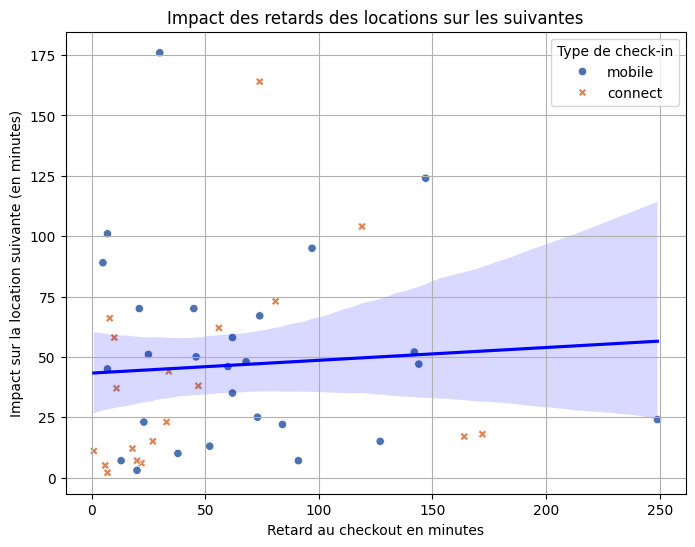

In [35]:
# Visualisation de l'impact des retards de checkout sur les locations suivantes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df_clean, x='delay_at_checkout_in_minutes', y='next_delay', hue='checkin_type', style='checkin_type', palette='deep')
sns.regplot(data=filtered_df_clean, x='delay_at_checkout_in_minutes', y='next_delay', scatter=False, color='blue')
plt.title('Impact des retards des locations sur les suivantes')
plt.xlabel('Retard au checkout en minutes')
plt.ylabel('Impact sur la location suivante (en minutes)')
plt.legend(title='Type de check-in')
plt.grid(True)
plt.show()

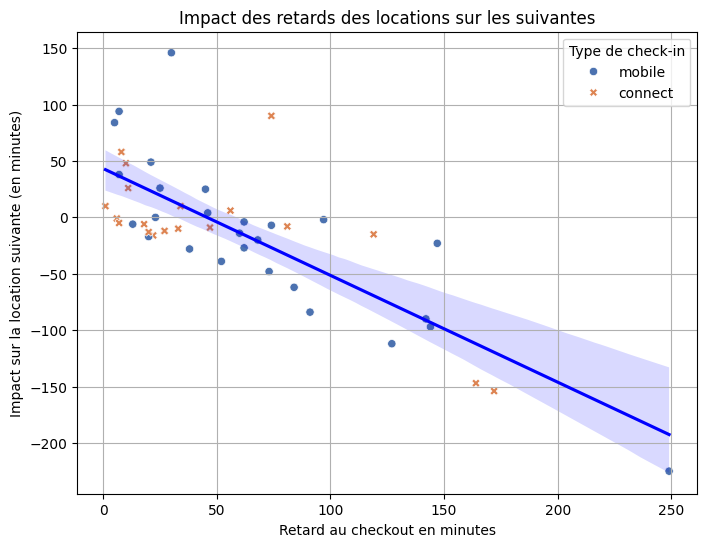

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df_clean, x='delay_at_checkout_in_minutes', y='impact_on_next_rental', hue='checkin_type', style='checkin_type', palette='deep')
sns.regplot(data=filtered_df_clean, x='delay_at_checkout_in_minutes', y='impact_on_next_rental', scatter=False, color='blue')
plt.title('Impact des retards des locations sur les suivantes')
plt.xlabel('Retard au checkout en minutes')
plt.ylabel('Impact sur la location suivante (en minutes)')
plt.legend(title='Type de check-in')
plt.grid(True)
plt.show()

In [37]:
filtered_df_clean['next_delay'].max()

176

#### 4- Combien de cas problématiques cela permettra-t-il de résoudre en fonction du seuil et de la portée choisis ?

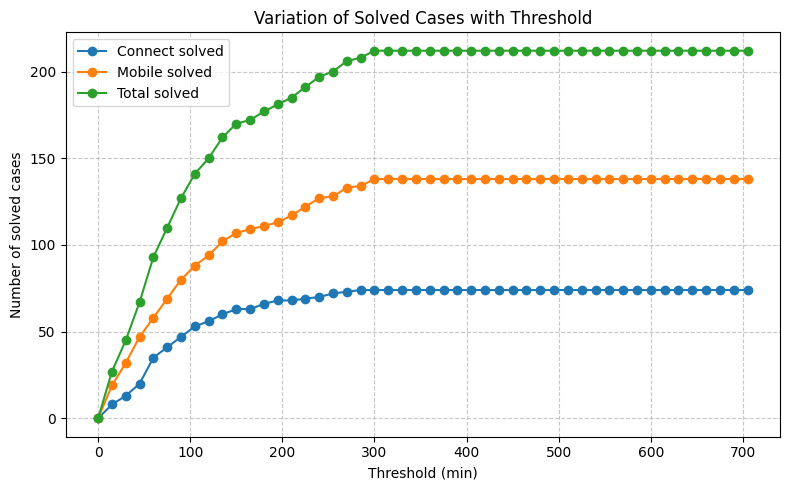

In [38]:
# Calcul et affichage des cas résolus

fig, ax = plt.subplots(figsize=(8, 5))  # Utilisation d'un seul subplot

ax.plot(threshold_range, solved_list_connect, label='Connect solved', marker='o')
ax.plot(threshold_range, solved_list_mobile, label='Mobile solved', marker='o')
ax.plot(threshold_range, solved_list_total, label='Total solved', marker='o')

# Ajouter des étiquettes et des légendes
ax.set_xlabel('Threshold (min)')
ax.set_ylabel('Number of solved cases')
ax.set_title('Variation of Solved Cases with Threshold')
ax.legend()

# Afficher le graphique
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
